# YOLOv5 - Prediccion - Cross Validation


En este notebook, se desarrolla la predicción del modelo YOLOv5 para la detección de insectos en fotografías de plantas, destinado a generar una red de polinizadores. 

## Paquetes

In [1]:
# import torch
# from yolov5 import YOLOv5
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report

In [5]:
import pathlib
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

# Modelo entrenado


Usamos los modelos entrenados con el dataset de plantas e insectos, generados en la validación cruzada.

In [6]:
# Imágenes de test
images = os.listdir('test')

# Dataframe vacío
df = pd.DataFrame({'imagen': [], 'deteccion': [], 'nivel': []})
for m in range(1, 6):
    print("---------------------------")
    print("Fold", m)
    model = YOLOv5(f"yolov5m_fold{m}/weights/best.pt", device="cpu") 
    # Recorro las imágenes de validación
    detecciones = []
    niveles = []
    k = 0
    for img in images:
        # Obtengo la predicción
        results = model.predict("test/" + img)
        # Procesar los resultados
        detection = results.pandas().xyxy[0]
        # Tomar la detección con mayor confianza
        detection = detection[detection["confidence"] == detection["confidence"].max()]
        # Guardo la detección
        try:
            nivel = detection["confidence"].values[0]
            detection = detection["name"].values[0]
        except:
            detection = 'no_detection'
            nivel = 0
        # Guardo la detección
        detecciones.append(detection)
        niveles.append(nivel)
        k += 1
        if k%500 == 0:
            print(f"Van {k} imágenes")

    # Genero el dataframe con las imagenes y las detecciones
    df_temp = pd.DataFrame({'imagen': images, 'deteccion': detecciones, 'nivel': niveles})
    # Concateno los dataframes
    df = pd.concat([df, df_temp])
# Reinicio los índices
df.reset_index(drop=True, inplace=True)
# Reviso los resultados
print(df.shape)
display(df.head())

YOLOv5  2023-12-12 Python-3.8.10 torch-1.13.1+cpu CPU

Fusing layers... 
Model summary: 291 layers, 20895564 parameters, 0 gradients, 48.3 GFLOPs
Adding AutoShape... 


---------------------------
Fold 1
Van 500 imágenes
Van 1000 imágenes
Van 1500 imágenes


YOLOv5  2023-12-12 Python-3.8.10 torch-1.13.1+cpu CPU

Fusing layers... 
Model summary: 291 layers, 20895564 parameters, 0 gradients, 48.3 GFLOPs
Adding AutoShape... 


---------------------------
Fold 2
Van 500 imágenes
Van 1000 imágenes
Van 1500 imágenes


YOLOv5  2023-12-12 Python-3.8.10 torch-1.13.1+cpu CPU

Fusing layers... 
Model summary: 291 layers, 20895564 parameters, 0 gradients, 48.3 GFLOPs
Adding AutoShape... 


---------------------------
Fold 3
Van 500 imágenes
Van 1000 imágenes
Van 1500 imágenes


YOLOv5  2023-12-12 Python-3.8.10 torch-1.13.1+cpu CPU

Fusing layers... 


---------------------------
Fold 4


Model summary: 291 layers, 20895564 parameters, 0 gradients, 48.3 GFLOPs
Adding AutoShape... 


Van 500 imágenes
Van 1000 imágenes
Van 1500 imágenes


YOLOv5  2023-12-12 Python-3.8.10 torch-1.13.1+cpu CPU

Fusing layers... 
Model summary: 291 layers, 20895564 parameters, 0 gradients, 48.3 GFLOPs
Adding AutoShape... 


---------------------------
Fold 5
Van 500 imágenes
Van 1000 imágenes
Van 1500 imágenes
(8195, 3)


,imagen,deteccion,nivel
0,00068ee5e4632cf05be16306f00aa51b.jpg,Diptera,0.692360
1,0065808ec8a40acb4dbaf1a855045a1b.jpg,no_detection,0.000000
2,00720ef5141a225e95a973c785e5292b.jpg,Wasp,0.412539
3,00ad5ae0ef6fe82cad95e54e8f478857.jpg,Wasp,0.676793
4,00ad5ae0ef6fe82cad95e54e8f478857_reflejada1.jpg,Wasp,0.768994


Unimos con la información de las imágenes.

In [7]:
# Leo el dataset
data = pd.read_csv('info_imagenes_cat.csv')
data = data[['imagen', 'categoría']]
# Diccionario de categorias 
cat = { 0: 'Bee', 1: 'Lepidoptera', 2: 'Diptera', 3: 'Coleoptera', 4: 'Others', 5: 'Wasp', 6: 'Hoverfly'}
# Cambio las categorias por números
data['categoría'] = data['categoría'].map(cat)
# Merge
df = pd.merge(df, data, on='imagen')
# Reviso
print(df.shape)
display(df.head(5))
# Guardo
df.to_csv('detecciones-crossval.csv', index=False)

(9630, 4)


,imagen,deteccion,nivel,categoría
0,00068ee5e4632cf05be16306f00aa51b.jpg,Diptera,0.692360,Diptera
1,00068ee5e4632cf05be16306f00aa51b.jpg,Diptera,0.827951,Diptera
2,00068ee5e4632cf05be16306f00aa51b.jpg,Diptera,0.830186,Diptera
3,00068ee5e4632cf05be16306f00aa51b.jpg,Diptera,0.886466,Diptera
4,00068ee5e4632cf05be16306f00aa51b.jpg,no_detection,0.000000,Diptera


Seleccionamos como detección la de mayor confianza promedio de los modelos.

In [2]:
# Leo el dataset
df = pd.read_csv('detecciones-crossval.csv')
display(df.head(10))

,imagen,deteccion,nivel,categoría
0,00068ee5e4632cf05be16306f00aa51b.jpg,Diptera,0.692360,Diptera
1,00068ee5e4632cf05be16306f00aa51b.jpg,Diptera,0.827951,Diptera
2,00068ee5e4632cf05be16306f00aa51b.jpg,Diptera,0.830186,Diptera
3,00068ee5e4632cf05be16306f00aa51b.jpg,Diptera,0.886466,Diptera
4,00068ee5e4632cf05be16306f00aa51b.jpg,no_detection,0.000000,Diptera
5,0065808ec8a40acb4dbaf1a855045a1b.jpg,no_detection,0.000000,Bee
6,0065808ec8a40acb4dbaf1a855045a1b.jpg,no_detection,0.000000,Bee
7,0065808ec8a40acb4dbaf1a855045a1b.jpg,no_detection,0.000000,Bee
8,0065808ec8a40acb4dbaf1a855045a1b.jpg,no_detection,0.000000,Bee
9,0065808ec8a40acb4dbaf1a855045a1b.jpg,Bee,0.866105,Bee


In [3]:
# Agrupo por media de nivel
df = df.groupby(['imagen', 'deteccion', 'categoría']).agg({'nivel': 'mean'}).reset_index()
# Tomo la detección con mayor nivel
df = df.sort_values(by='nivel', ascending=False).drop_duplicates(subset=['imagen', 'categoría'])
# Ordeno por index
df.sort_index(inplace=True)
# Reviso
print(df.shape)
df.head(5)

(1744, 4)


,imagen,deteccion,categoría,nivel
0,00068ee5e4632cf05be16306f00aa51b.jpg,Diptera,Diptera,0.809241
2,0065808ec8a40acb4dbaf1a855045a1b.jpg,Bee,Bee,0.866105
4,00720ef5141a225e95a973c785e5292b.jpg,Wasp,Bee,0.569838
6,00ad5ae0ef6fe82cad95e54e8f478857.jpg,Wasp,Wasp,0.744994
7,00ad5ae0ef6fe82cad95e54e8f478857_reflejada1.jpg,Wasp,Wasp,0.741251


Guardo los resultados en un archivo csv.

In [4]:
# Guardo el dataframe
df.to_csv('test_yolov5m_crossval.csv', index=False)

Calculo las métricas de desempeño.

In [5]:
# Leo el dataframe
df = pd.read_csv('test_yolov5m_crossval.csv')
true_labels, predicted_labels = df['categoría'], df['deteccion']
print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

         Bee       0.89      0.69      0.78       549
  Coleoptera       0.91      0.55      0.68       291
     Diptera       0.85      0.70      0.77       369
    Hoverfly       0.32      0.70      0.44        10
 Lepidoptera       0.96      0.78      0.86       236
      Others       0.68      0.57      0.62       185
        Wasp       0.75      0.77      0.76       104
no_detection       0.00      0.00      0.00         0

    accuracy                           0.67      1744
   macro avg       0.67      0.60      0.61      1744
weighted avg       0.86      0.67      0.75      1744



c:\Users\aemer\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\aemer\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\aemer\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

Matriz de confusión.

<AxesSubplot: xlabel='Detección', ylabel='Categoría'>

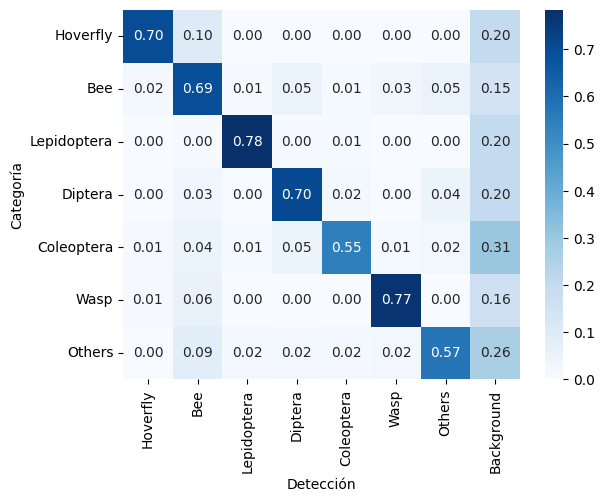

In [6]:
tabla = pd.crosstab(df['categoría'], df['deteccion'], normalize='index')
# reordeno
orden = ["Hoverfly", "Bee", "Lepidoptera", "Diptera", "Coleoptera", "Wasp", "Others",  "no_detection"]
tabla = tabla.reindex(orden[:-1])
tabla = tabla[orden]
# Nombro a los índices categoría
tabla.index.name = 'Categoría'
# Nombro a las columnas detección
tabla.columns.name = 'Detección'
# cambio el nombre de no_detection por background
tabla.rename(columns={'no_detection':'Background'}, inplace=True)
# display(tabla)
sns.heatmap(tabla, cmap="Blues", annot=True, fmt=".2f")